# Titanic Project


## In this project we will discuss the data analysis of Titanic crash and will try to look deeper into the information to get the answers of different questions that are raised while looking into the collected data by kaggle.


## The Questions that I think should be clearlly answerable from the provided dataset

### 1) Is it possible that pclass(Socio-economic class) has any interference with number of lives saved?
#### hypothesis 1) pclass had no effect on the lives saved
### 2) Did gender played any role in saving lives of the Passanger?
#### hypothesis 2) gender didnot play any role in saving lives.



From the Titanic data, we can see the various features present for each passenger on the ship:

    Survived: Outcome of survival (0 = No; 1 = Yes)
    Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
    Name: Name of passenger
    Sex: Sex of the passenger
    Age: Age of the passenger (Some entries contain NaN)
    SibSp: Number of siblings and spouses of the passenger aboard
    Parch: Number of parents and children of the passenger aboard
    Ticket: Ticket number of the passenger
    Fare: Fare paid by the passenger
    Cabin Cabin number of the passenger (Some entries contain NaN)
    Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

This information is available on kaggle's website


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### First thing first taking a look at dataset to create a idea to answer the raised questions.

In [3]:
data = pd.read_csv('titanic-data.csv')
print(data.head())
print(data.tail())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

#### After looking into the data and proposed questions, I think following coloums dosent play much role in the dataset 

    Name
    Ticket
    Cabin
    Fare
    Embarked
    Parch
    SibSp
    
So the above listed coloums will be removed.
And it will be followed by the data cleaning to take care of missing values

In [4]:
clean_data = data.drop(['Name','Ticket','Cabin','Fare','Embarked', 'Parch', 'SibSp'], axis=1)
print(clean_data.head())

   PassengerId  Survived  Pclass     Sex   Age
0            1         0       3    male  22.0
1            2         1       1  female  38.0
2            3         1       3  female  26.0
3            4         1       1  female  35.0
4            5         0       3    male  35.0


#### Now Dealing with the missing values as they may affect the outcome
#### Therefore we will calculate the mean value and then will replace it from NAN 

In [5]:
age_mean = np.mean(clean_data['Age'])
print age_mean

29.6991176471


#### So to Handle the missing values, replace null by mean

In [6]:
clean_data['Age'] = clean_data['Age'].replace(np.nan, age_mean)

In [7]:
print clean_data.head()
print clean_data.tail()

   PassengerId  Survived  Pclass     Sex   Age
0            1         0       3    male  22.0
1            2         1       1  female  38.0
2            3         1       3  female  26.0
3            4         1       1  female  35.0
4            5         0       3    male  35.0
     PassengerId  Survived  Pclass     Sex        Age
886          887         0       2    male  27.000000
887          888         1       1  female  19.000000
888          889         0       3  female  29.699118
889          890         1       1    male  26.000000
890          891         0       3    male  32.000000


#### So from above display we now no longer need the age coloum as now we have a updated age where every person is  having a age value.

#### Now calculating the standerd statistics for the dataset to get a genral idea of distribution


In [9]:
clean_data.describe()

,PassengerId,Survived,Pclass,Age
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118
std,257.353842,0.486592,0.836071,13.002015
min,1.000000,0.000000,1.000000,0.420000
25%,223.500000,0.000000,2.000000,22.000000
50%,446.000000,0.000000,3.000000,29.699118
75%,668.500000,1.000000,3.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000


#### The above chart provides the various values for the dataset such as total count, mean, standerd deviation, Maximum and minimum

#### list of survived and dead which will provide us the final stage to answer our questions

In [10]:
survived = clean_data[clean_data.Survived==True]
dead = clean_data[clean_data.Survived==False]

In [11]:
print survived.head()
print'---------------'
print dead.head()

   PassengerId  Survived  Pclass     Sex   Age
1            2         1       1  female  38.0
2            3         1       3  female  26.0
3            4         1       1  female  35.0
8            9         1       3  female  27.0
9           10         1       2  female  14.0
---------------
   PassengerId  Survived  Pclass   Sex        Age
0            1         0       3  male  22.000000
4            5         0       3  male  35.000000
5            6         0       3  male  29.699118
6            7         0       1  male  54.000000
7            8         0       3  male   2.000000


#### As we can see from the above display that the list of survived and dead is created and now we can start our analysis from this list

#### Now in order to answer our first question we will group the data as per there Socio-economic class and then we will plot them to get our answers

In [12]:
class_of_survived = survived.groupby(['Pclass']).size()
class_of_dead = dead.groupby(['Pclass']).size()

### # 1) Is it possible that pclass(Socio-economic class) has any interference with number of lives saved?


In [13]:
print class_of_survived
print'-----------------'
print class_of_dead

Pclass
1    136
2     87
3    119
dtype: int64
-----------------
Pclass
1     80
2     97
3    372
dtype: int64


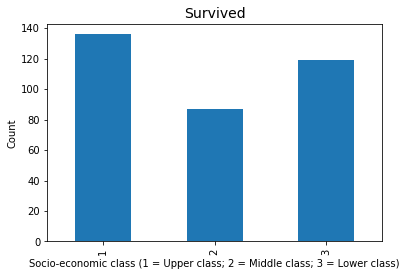

In [14]:
survived.groupby(['Pclass']).size().plot(kind='bar',stacked=True)
plt.ylabel('Count')
plt.xlabel('Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)')
plt.title('Survived',fontsize=14)

Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)

From the above graph we can see that lots of lives were saved

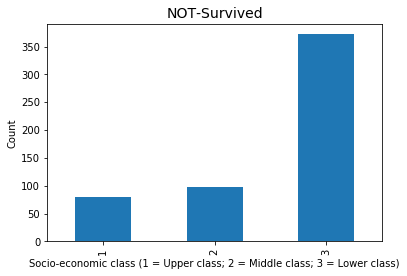

In [15]:
dead.groupby(['Pclass']).size().plot(kind='bar',stacked=True)
plt.ylabel('Count')
plt.xlabel('Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)')
plt.title('NOT-Survived',fontsize=14)

Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)

The above plot shows the distribution 

In [117]:
data_socio = pd.pivot_table(data=clean_data,
                       values='PassengerId', index='Pclass', columns='Survived', aggfunc='count')

print data_socio

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


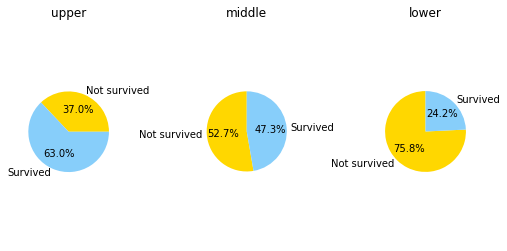

In [126]:
upper = data_socio.loc[1]
middle = data_socio.loc[2]
lower = data_socio.loc[3]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,4))
pie_1 = axes[0].pie(upper, labels=['Not survived','Survived'],
                    autopct='%1.1f%%', colors=['gold', 'lightskyblue'])

axes[0].set_title('upper')
axes[0].axis('equal')

pie_2 = axes[1].pie(middle, labels=['Not survived','Survived'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
axes[1].set_title('middle')
axes[1].axis('equal')

pie_3 = axes[2].pie(lower, labels=['Not survived','Survived'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])

axes[2].set_title('lower')
axes[2].axis('equal')

plt.subplots_adjust(wspace=1)

#### To get a more detailed look, I have again ploted the socio-economic class but this time using pie chart and it gives us even more information compared to bar plot

#### Lets put some thought on what could have happened when titanic went down in the sea, from the above charts and displayed value one thing is clear that lots of passenger did survived the accident. But when we look closer we come to our first question that is " Does Socio-economic class has any effect of saving the number of lifes ?"

#### So to answer this we first divided the dataset into survived and dead and then they were further grouped on there Socio-economic classes, this step has reveled that the passenger class has a remarkable effect on the number of lives saved. if we take a look on the chart titled as Not-Survived we can clearly see that coloum representing the lower class is very high as compare to other coloums. 

#### So for our first hypothesis that pclass had no effect on the lives saved.
#### null is rejected as from the chart it is visible in conclusion we will discuss what could be the reason behind this. 

### #2) Did gender played any role in saving lives of the Passanger?

#### Now to answer our next question we will regroup the data as per there gender

In [127]:
gender_based_survived = pd.crosstab(survived['Survived'], survived['Sex'])
gender_based_dead = pd.crosstab(dead['Survived'], dead['Sex'])

In [44]:
print gender_based_survived
print gender_based_dead

Sex       female  male
Survived              
1            233   109
Sex       female  male
Survived              
0             81   468


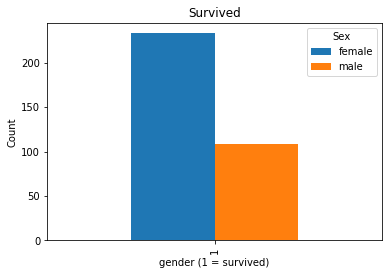

In [45]:
pd.crosstab(survived['Survived'], survived['Sex']).plot(kind = 'bar', stacked = False)
plt.title('Survived')
plt.ylabel('Count')
plt.xlabel('gender (1 = survived)')


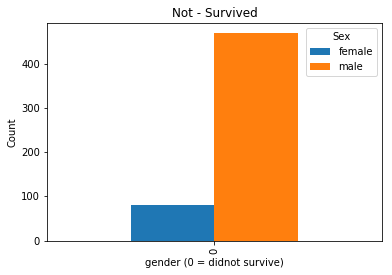

In [46]:
pd.crosstab(dead['Survived'], dead['Sex']).plot(kind = 'bar',stacked = False)
plt.title('Not - Survived')
plt.ylabel('Count')
plt.xlabel('gender (0 = didnot survive)')

In [115]:
data_gender = pd.pivot_table(data=clean_data,
                       values='PassengerId', index='Sex', columns='Survived', aggfunc='count')

print data_gender

Survived    0    1
Sex               
female     81  233
male      468  109


(-1.1024244704370045,
 1.1051575290289077,
 -1.1038686046053754,
 1.1001842192669227)

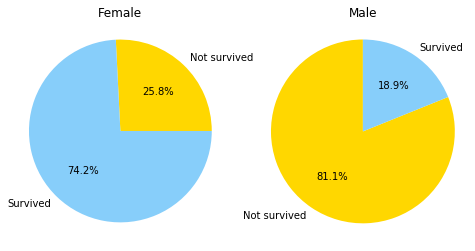

In [116]:
female = data_gender.loc['female']
male = data_gender.loc['male']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
pie_1 = axes[0].pie(female, labels=['Not survived','Survived'],
                    autopct='%1.1f%%', colors=['gold', 'lightskyblue'])

axes[0].set_title('Female')
axes[0].axis('equal')
pie_2 = axes[1].pie(male, labels=['Not survived','Survived'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
axes[1].set_title('Male')
plt.axis('equal')

#### Now using the pie chart to compare the data of survived and Not-survived for male and female passenger

#### For the Second question "Did gender played any role in saving lives ?"
#### our hypothesis says that gender had nothing to do with lives saved.
#### but if we take a look at charts its very clear that female passengers were saved as the priority. 
#### So based on this we reject the null hypothesis.

### Conclusion:

#### From the above two questions and there hypothesis analysis we must make some conclusion about what could have have happened. And as per my analysis and understanding about the build of titanic 1)Socio-economic group did played a rol when it came to passenger survived as, passengers from upper class had there cabins towards the upper deck, which made it very easy for them to access the life saving boats.  As compared to lower class whoes cabins were situated at the lower decks as a result when the accident happened they didnt had much of the time to react and resulted in tremandous loss of life. 2) Also about the gender being a one of the major player in saving lives, I think as it was the most and obvious decision to save females first as a part of first and most basic instinct of a human.

#### And as a part of further exploration i will definatlly look into the possiblity of age factor and one thing I think I will enjoy solving is all those who travled with family did maneged to get atleast one of there family member to survive.